<a href="https://colab.research.google.com/github/shailendra-repo/Python/blob/main/Historical_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Historical stock data

In [1]:
import pandas as pd
import pandas_datareader
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 3)

In [2]:
start = datetime.date(2012,1,1)
end = datetime.date(2014,12,30)

In [3]:
#!pip install pandas_datareader --upgrade

In [4]:
msft = pandas_datareader.DataReader('MSFT','yahoo',start,end)
msft

             High    Low   Open  Close     Volume  Adj Close
Date                                                        
2012-01-03  26.96  26.39  26.55  26.77  6.473e+07     21.707
2012-01-04  27.47  26.78  26.82  27.40  8.052e+07     22.218
2012-01-05  27.73  27.29  27.38  27.68  5.608e+07     22.445
2012-01-06  28.19  27.53  27.53  28.11  9.946e+07     22.794
2012-01-09  28.10  27.72  28.05  27.74  5.971e+07     22.494
...           ...    ...    ...    ...        ...        ...
2014-12-23  48.80  48.13  48.37  48.45  2.365e+07     42.761
2014-12-24  48.64  48.08  48.64  48.14  1.144e+07     42.487
2014-12-26  48.41  47.82  48.41  47.88  1.320e+07     42.258
2014-12-29  47.78  47.26  47.70  47.45  1.444e+07     41.878
2014-12-30  47.62  46.84  47.44  47.02  1.638e+07     41.499

[753 rows x 6 columns]

In [5]:
def get(tickers, start, end):
  def data(ticker):
    return pandas_datareader.DataReader(ticker, 'yahoo',start, end)

  datas = map(data,tickers)
  return pd.concat(datas, keys=tickers, names=['Ticker','Date'])

In [6]:

# retrieves the historical prices for a list of stocks
def get(tickers, start, end):
    def data(ticker):
        return pandas_datareader.DataReader(ticker, 'yahoo', 
                                     start, end)
        
    datas = map(data, tickers)
    
    return pd.concat(datas, keys=tickers, 
                     names=['Ticker', 'Date'])

In [7]:

# get data for the following stocks
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']
all_data = get(tickers, start, end)
all_data[:5]

                     High     Low    Open   Close     Volume  Adj Close
Ticker Date                                                            
AAPL   2012-01-03  14.732  14.607  14.621  14.687  3.022e+08     12.610
       2012-01-04  14.810  14.617  14.643  14.766  2.600e+08     12.678
       2012-01-05  14.948  14.738  14.820  14.930  2.713e+08     12.819
       2012-01-06  15.098  14.972  14.992  15.086  3.183e+08     12.953
       2012-01-09  15.277  15.048  15.196  15.062  3.940e+08     12.932

In [8]:
all_data[:1]

                     High     Low    Open   Close     Volume  Adj Close
Ticker Date                                                            
AAPL   2012-01-03  14.732  14.607  14.621  14.687  3.022e+08      12.61

In [9]:
# get daily S&P500 info

sp_500 = pandas_datareader.DataReader("^GSPC",'yahoo',start, end)
sp_500.head()

               High      Low     Open    Close      Volume  Adj Close
Date                                                                 
2012-01-03  1284.62  1258.86  1258.86  1277.06  3943710000    1277.06
2012-01-04  1278.73  1268.10  1277.03  1277.30  3592580000    1277.30
2012-01-05  1283.05  1265.26  1277.30  1281.06  4315950000    1281.06
2012-01-06  1281.84  1273.34  1280.93  1277.81  3656830000    1277.81
2012-01-09  1281.99  1274.55  1277.83  1280.70  3371600000    1280.70

# Visualizing financial time series data

### Plotting closing prices

In [10]:
all_data['Adj Close']

Ticker  Date      
AAPL    2012-01-03    12.610
        2012-01-04    12.678
        2012-01-05    12.819
        2012-01-06    12.953
        2012-01-09    12.932
                       ...  
KO      2014-12-23    34.486
        2014-12-24    34.462
        2014-12-26    34.478
        2014-12-29    34.398
        2014-12-30    34.318
Name: Adj Close, Length: 6777, dtype: float64

In [11]:
# reset the index to make everythign columns

just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices.head()

  Ticker       Date  Adj Close
0   AAPL 2012-01-03     12.610
1   AAPL 2012-01-04     12.678
2   AAPL 2012-01-05     12.819
3   AAPL 2012-01-06     12.953
4   AAPL 2012-01-09     12.932

In [12]:
daily_close_px = just_closing_prices.pivot('Date','Ticker','Adj Close')
daily_close_px

Ticker          AA    AAPL     DAL  ...    MSFT     PEP    UAL
Date                                ...                       
2012-01-03  20.893  12.610   7.142  ...  21.707  49.918  18.90
2012-01-04  21.391  12.678   7.115  ...  22.218  50.174  18.52
2012-01-05  21.188  12.819   7.399  ...  22.445  49.783  18.39
2012-01-06  20.735  12.953   7.390  ...  22.794  49.159  18.21
2012-01-09  21.346  12.932   7.355  ...  22.494  49.415  17.93
...            ...     ...     ...  ...     ...     ...    ...
2014-12-23  36.890  25.510  42.422  ...  42.761  79.870  62.48
2014-12-24  36.984  25.390  43.250  ...  42.487  79.649  64.93
2014-12-26  37.101  25.838  43.556  ...  42.258  79.616  65.28
2014-12-29  37.101  25.820  43.907  ...  41.878  79.354  65.22
2014-12-30  37.172  25.505  44.312  ...  41.499  78.722  66.05

[753 rows x 9 columns]

In [13]:
daily_close_px[:5]

Ticker          AA    AAPL    DAL  ...    MSFT     PEP    UAL
Date                               ...                       
2012-01-03  20.893  12.610  7.142  ...  21.707  49.918  18.90
2012-01-04  21.391  12.678  7.115  ...  22.218  50.174  18.52
2012-01-05  21.188  12.819  7.399  ...  22.445  49.783  18.39
2012-01-06  20.735  12.953  7.390  ...  22.794  49.159  18.21
2012-01-09  21.346  12.932  7.355  ...  22.494  49.415  17.93

[5 rows x 9 columns]

<AxesSubplot:xlabel='Date'>

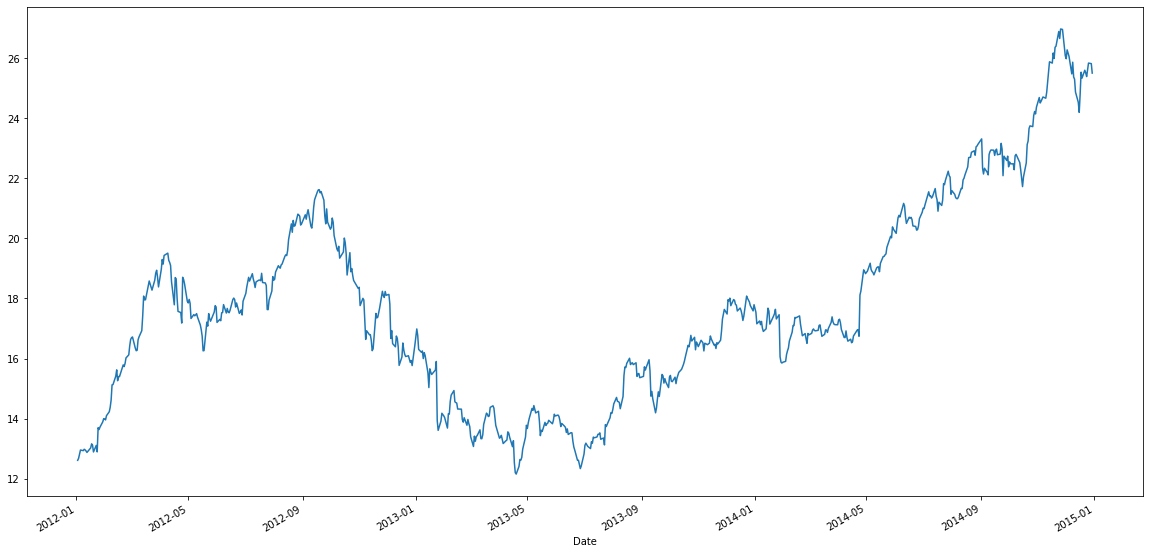

In [14]:
daily_close_px['AAPL'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

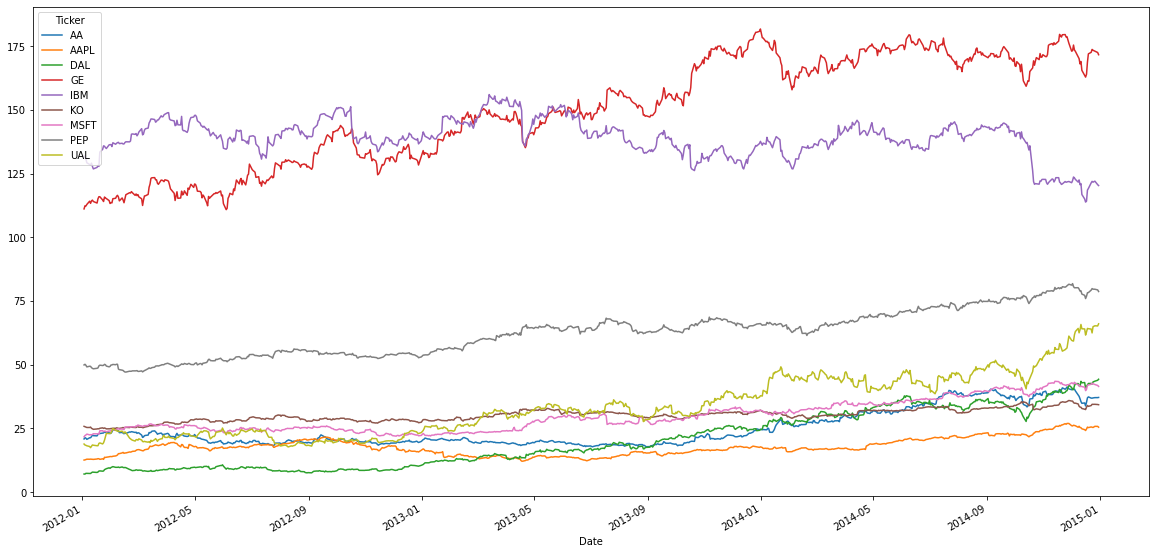

In [15]:
daily_close_px.plot(figsize=(20,10))

### Plotting volumes series data

In [16]:
msftV = all_data.Volume.loc['MSFT']
msftV

Date
2012-01-03    6.473e+07
2012-01-04    8.052e+07
2012-01-05    5.608e+07
2012-01-06    9.946e+07
2012-01-09    5.971e+07
                ...    
2014-12-23    2.365e+07
2014-12-24    1.144e+07
2014-12-26    1.320e+07
2014-12-29    1.444e+07
2014-12-30    1.638e+07
Name: Volume, Length: 753, dtype: float64

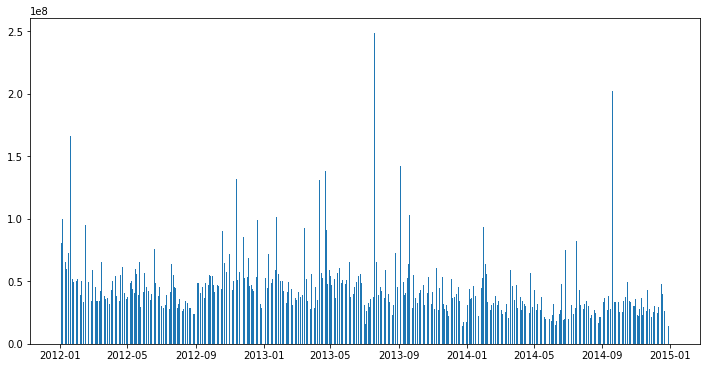

In [17]:
plt.bar(msftV.index, msftV)
plt.gcf().set_size_inches(12,6)

### Combined Price and Volumes

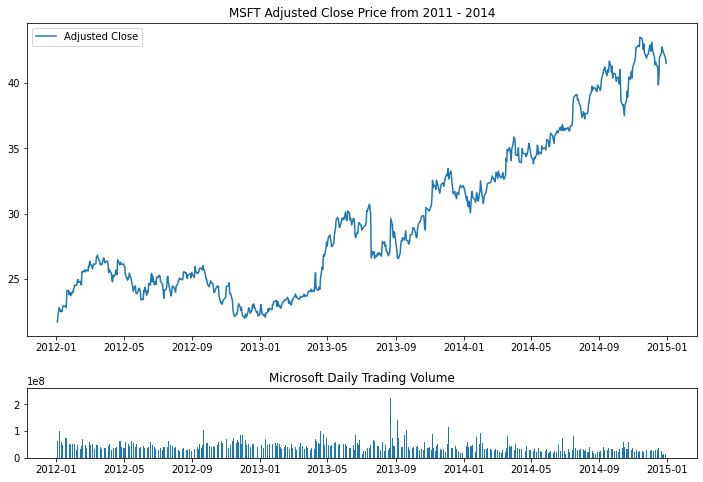

In [18]:

# draw a combined price vs volume graph
# subdivide the whole plot
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# plot the price chart on the top
top.plot(daily_close_px.index, 
         daily_close_px['MSFT'], 
         label='Adjusted Close')
plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.legend(loc=2)
# pick the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
# draw the bar at the bottom
bottom.bar(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8) 
# set the size
plt.subplots_adjust(hspace=0.75)
plt.savefig('5104OS_05_04.png', bbox_inches='tight', dpi=300)

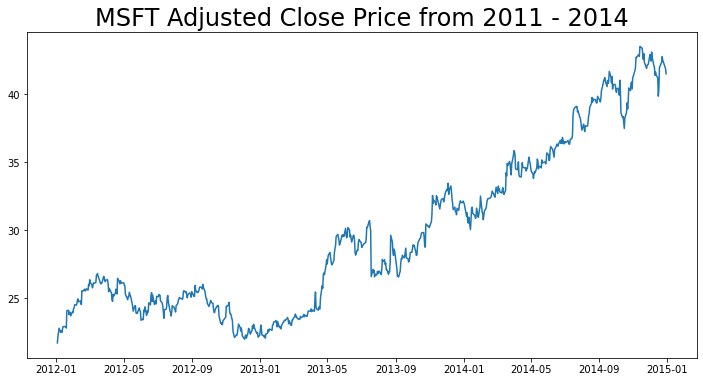

In [19]:
plt.plot(daily_close_px.index, daily_close_px.MSFT, label="MSFT Adj Close")
plt.title('MSFT Adjusted Close Price from 2011 - 2014', size=24)
plt.gcf().set_size_inches(12,6)



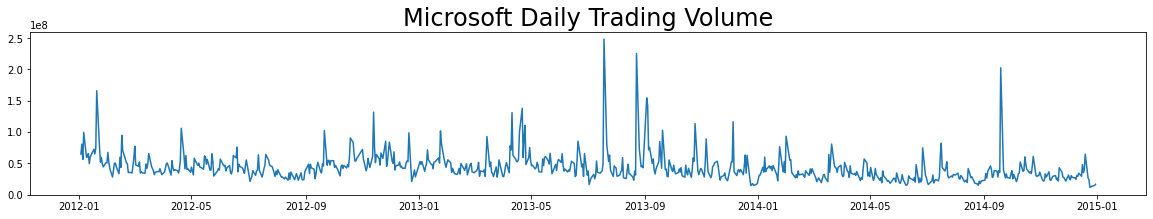

In [20]:
plt.plot(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume', size=24)
plt.gcf().set_size_inches(20,3)

## Plotting candlesticks

In [21]:
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'].reset_index()
subset[:5]

        Date   High    Low  ...  Close     Volume  Adj Close
0 2014-12-01  48.78  47.71  ...  48.62  3.119e+07     42.911
1 2014-12-02  49.05  48.20  ...  48.46  2.577e+07     42.770
2 2014-12-03  48.50  47.81  ...  48.08  2.353e+07     42.434
3 2014-12-04  49.06  48.20  ...  48.84  3.032e+07     43.105
4 2014-12-05  48.97  48.38  ...  48.42  2.731e+07     42.734

[5 rows x 7 columns]

In [22]:
subset.size

147

In [23]:
import matplotlib.dates as mdates
subset['Date'].apply(lambda date: mdates.date2num(date.to_pydatetime()))

0     16405.0
1     16406.0
2     16407.0
3     16408.0
4     16409.0
       ...   
16    16427.0
17    16428.0
18    16430.0
19    16433.0
20    16434.0
Name: Date, Length: 21, dtype: float64

In [24]:
subset['date_num'] = subset['Date'].apply(lambda date: mdates.date2num(date.to_pydatetime()))

In [25]:
subset.head()

        Date   High    Low  ...     Volume  Adj Close  date_num
0 2014-12-01  48.78  47.71  ...  3.119e+07     42.911   16405.0
1 2014-12-02  49.05  48.20  ...  2.577e+07     42.770   16406.0
2 2014-12-03  48.50  47.81  ...  2.353e+07     42.434   16407.0
3 2014-12-04  49.06  48.20  ...  3.032e+07     43.105   16408.0
4 2014-12-05  48.97  48.38  ...  2.731e+07     42.734   16409.0

[5 rows x 8 columns]

In [26]:
subset_as_tupes = [tuple(x) for x in subset[['date_num', 
                                              'Open', 
                                              'High', 
                                              'Low', 
                                              'Close']].values]
subset_as_tupes[:5]


[(16405.0,
  47.880001068115234,
  48.779998779296875,
  47.709999084472656,
  48.619998931884766),
 (16406.0,
  48.84000015258789,
  49.04999923706055,
  48.20000076293945,
  48.459999084472656),
 (16407.0, 48.439998626708984, 48.5, 47.810001373291016, 48.08000183105469),
 (16408.0,
  48.38999938964844,
  49.060001373291016,
  48.20000076293945,
  48.84000015258789),
 (16409.0,
  48.81999969482422,
  48.970001220703125,
  48.380001068115234,
  48.41999816894531)]

In [27]:
# required imports for fomatting
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d')  # e.g., Jan 12

In [28]:

# We want to only display labels for Mondays
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays

In [29]:
#!pip install matplotlib --upgrade

ModuleNotFoundError: ignored

<Figure size 864x576 with 0 Axes>

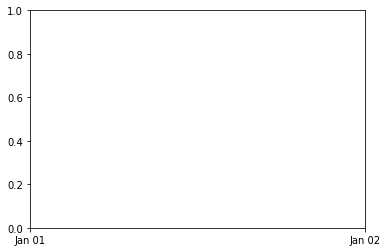

In [30]:
# now draw the plot
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
# set the locator and formatter for the x-axis
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)

# draw the candlesticks
from matplotlib.finance import candlestick_ohlc 
_ = candlestick_ohlc(ax, subset_as_tuples, width=0.6, 
                     colorup='g',colordown='r');
plt.savefig('5104OS_05_05.png', bbox_inches='tight', dpi=300)

## Fundamental Financial Calculations